# Exploratory Data Analysis

#### We build some graphs and make a word cloud in the notebook below. It's pretty clear the data is skewed toward 0 Treatment Number, Recommendation score, and Relevancy_Score

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from seaborn import set_style
set_style("whitegrid")
import seaborn as sns
from PIL import Image 

In [2]:
data_df = pd.read_csv("enumerated_scraped_comments.csv")
data_df

,Author,Unnamed: 0,Comment,Post,Diagnosis_Number,Diagnosis,Therapy_Number,Therapies,Drugs,Drug_Number,Treatment_Number,Treatment_Confirmation,Sentiment_of_Treatment,Recommendation_Score,Recommendation,Keyword_Score,Relevancy_Score,Relevancy
0,-Massive-Feeling-,8,the reaction that still makes me laugh so hard...,qv78g6,"(0, 0, 0, 0)",indeterminate,0,[],[],0,0,This user is not receiving treatment,0.2157,0,This user does not recommend their treatment p...,0,0,This information is not relevant.
1,-Rosewiththorns-,35,me too literally exactly me too my herbal meds...,1agxmz3,"(0, 0, 0, 0)",indeterminate,0,[],[],0,0,This user is not receiving treatment,0.0000,0,This user does not recommend their treatment p...,1,1,This information is minimally relevant.
2,0w_l,3,haha shit man live really hates us really thou...,mtba08,"(0, 0, 0, 0)",indeterminate,0,[],[],0,0,This user is not receiving treatment,-0.8923,0,This user does not recommend their treatment p...,0,0,This information is not relevant.
3,0ystersbutnopearls,72,hi dr k i have two questions what is your pers...,12xrl1n,"(0, 0, 0, 0)",indeterminate,0,[],[],0,0,This user is not receiving treatment,0.7002,0,This user does not recommend their treatment p...,2,1,This information is minimally relevant.
4,100260,23,my psychiatrist actually took me off all my me...,"172cqod, 15tt6zt","(0, 0, 0, 0)",indeterminate,0,[],"['effexor', 'antidepressant', 'Venlafaxine', '...",4,1,This user is receiving treatment,0.5301,1,This user recommends their treatment plan.,7,2,This information is relevant.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,zanny2019,0,has she done any form of therapy i have succes...,1bwiezw,"(0, 0, 0, 0)",indeterminate,1,['dbt'],[],0,1,This user is receiving treatment,0.8935,1,This user recommends their treatment plan.,4,0,This information is not relevant.
1477,zipclam,2,sadly there is not any approved medications fo...,"nuvvwa, nuvvwa","(0, 0, 0, 0)",indeterminate,1,['dbt'],"['lexapro', 'wellbutrin', 'vyvanse', 'stabiliz...",9,1,This user is receiving treatment,0.8703,1,This user recommends their treatment plan.,11,3,This information is very relevant.
1478,zombab,44,given your post history it sounds like you nee...,"y5ay6h, y5ay6h","(0, 0, 0, 0)",indeterminate,0,[],[],0,0,This user is not receiving treatment,-0.4019,0,This user does not recommend their treatment p...,1,1,This information is minimally relevant.
1479,zordee,0,i am on lithium and i have been on it for a fe...,og1x5t,"(0, 0, 0, 0)",indeterminate,0,[],['lithium'],1,1,This user is receiving treatment,0.9527,1,This user recommends their treatment plan.,2,2,This information is relevant.


In [3]:
from wordcloud import WordCloud
all_words = []
for i in range(0, len(data_df)):
    all_words.extend(data_df['Comment'].iloc[i].split())

all_string = ' '.join(all_words)

In [4]:
high = []
for i in range(0,len(data_df)):
    if data_df['Relevancy_Score'].iloc[i] == 4:
        high.append(i)
num_high = len(high)

very = []
for i in range(0,len(data_df)):
    if data_df['Relevancy_Score'].iloc[i] == 3:
        very.append(i)
num_very = len(very)

rel = []
for i in range(0,len(data_df)):
    if data_df['Relevancy_Score'].iloc[i] == 2:
        rel.append(i)
num_rel = len(rel)

min_rel = []
for i in range(0,len(data_df)):
    if data_df['Relevancy_Score'].iloc[i] == 1:
        min_rel.append(i)
num_min_rel = len(min_rel)

no_rel = []
for i in range(0,len(data_df)):
    if data_df['Relevancy_Score'].iloc[i] == 0:
        no_rel.append(i)
num_no_rel = len(no_rel)

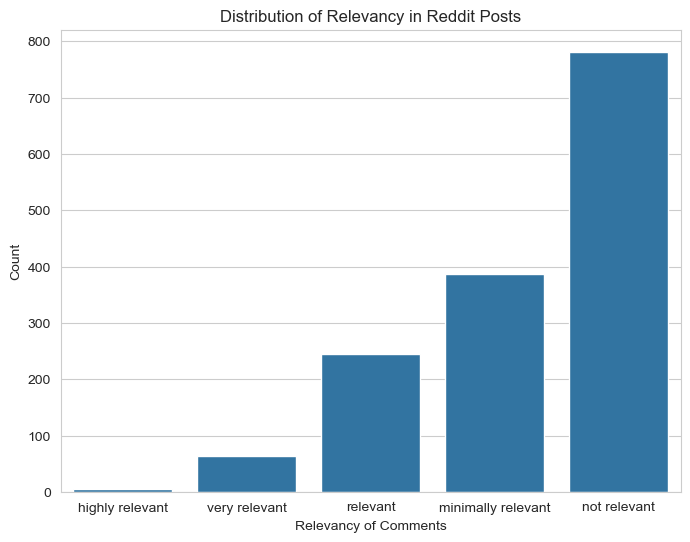

In [5]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['highly relevant', 'very relevant', 'relevant', 'minimally relevant', 'not relevant'], y=[num_high, num_very, num_rel, num_min_rel,num_no_rel])
plt.xlabel("Relevancy of Comments")
plt.ylabel("Count")
plt.title("Distribution of Relevancy in Reddit Posts")
plt.show()

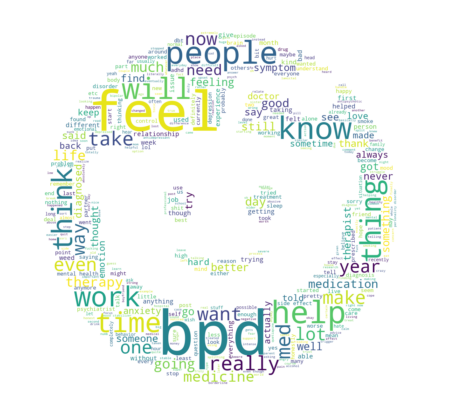

In [6]:
reddit_logo = np.array(Image.open('redditlogo.jpg'))
wordcloud = WordCloud(width=900, height=600, background_color='white',max_words=400,mask=reddit_logo).generate(all_string)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
recs = []
for i in range(0,len(data_df)):
    if data_df['Recommendation_Score'].iloc[i] == 1:
        recs.append(i)
rec_num = len(recs)
norec_num = len(data_df) - len(recs)

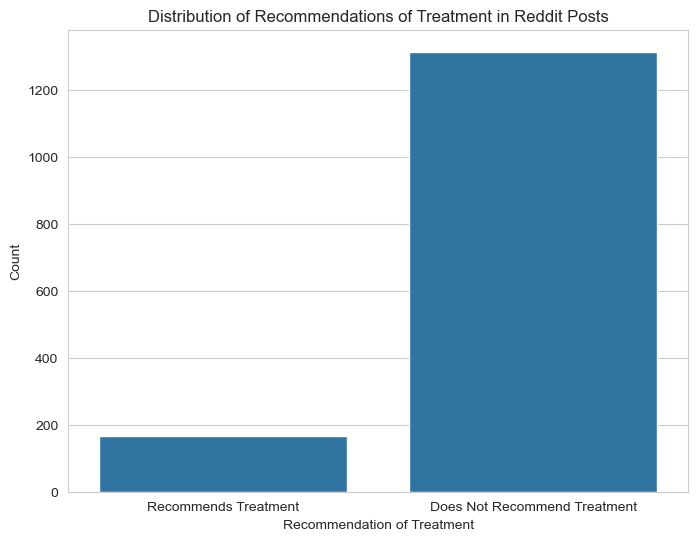

In [11]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['Recommends Treatment', 'Does Not Recommend Treatment'], y=[rec_num, norec_num])
plt.xlabel("Recommendation of Treatment")
plt.ylabel("Count")
plt.title("Distribution of Recommendations of Treatment in Reddit Posts")
plt.show()

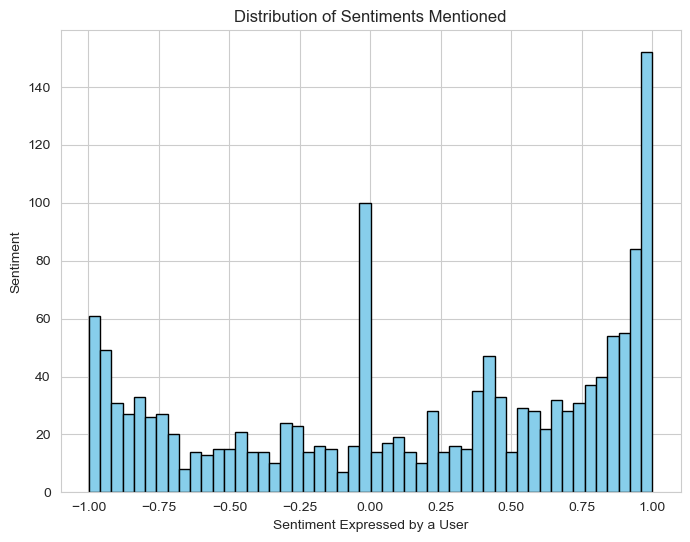

In [13]:
plt.figure(figsize=(8, 6))
x=list(data_df['Sentiment_of_Treatment'].values)
plt.hist(x, bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Sentiment Expressed by a User")
plt.ylabel("Sentiment")
plt.title("Distribution of Sentiments Mentioned")
plt.show()

In [14]:
Confirmation = []
for i in range(0,len(data_df)):
    if data_df['Treatment_Confirmation'].iloc[i] == 'This user is receiving treatment':
        Confirmation.append(i)
conf_num = len(Confirmation)
den_num = len(data_df) - len(Confirmation)

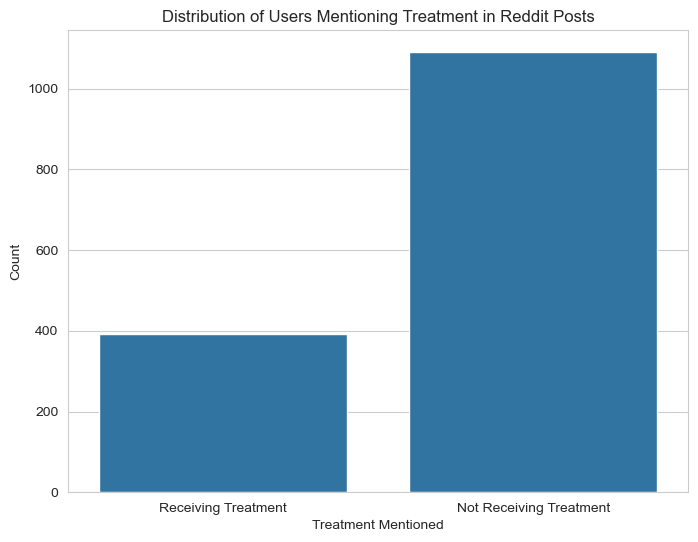

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['Receiving Treatment', 'Not Receiving Treatment'], y=[conf_num, den_num])
plt.xlabel("Treatment Mentioned")
plt.ylabel("Count")
plt.title("Distribution of Users Mentioning Treatment in Reddit Posts")
plt.show()

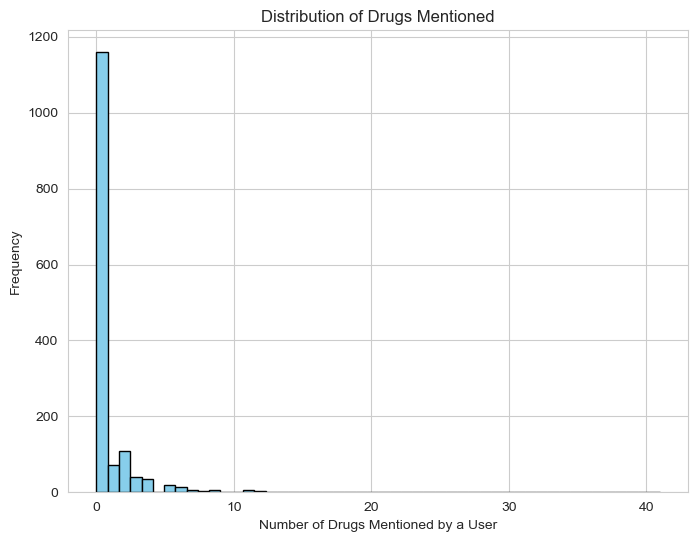

In [18]:
plt.figure(figsize=(8, 6))
x=list(data_df['Drug_Number'].values)
plt.hist(x, bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Number of Drugs Mentioned by a User")
plt.ylabel("Frequency")
plt.title("Distribution of Drugs Mentioned")
plt.show()

In [19]:
set(data_df['Drugs'].values)
list_of_lists_drugs = set([''.join(data_df['Drugs'].iloc[i]) for i in range(0,len(data_df))])
jet = ''
for i in list_of_lists_drugs:
    jet += ',' + i
huge_list_of_drugs = [['quetiapine', 'Quetiapine'],['zoloft', 'cymbalta', 'Duloxetine', 'Sertraline', 'Levomilnacipran', 'Ketamine'],['lamictal', 'Cariprazine', 'Lamotrigine'],['seroquel', 'wellbutrin', 'lithium', 'klonopin', 'Quetiapine', 'Bupropion', 'Clonazepam'],['stabilizers', 'stabilizer'],['cipralex', 'Escitalopram'],['seroquel', 'vyvanse', 'naltrexone', 'Quetiapine', 'Naltrexone', 'Lisdexamfetamine', 'Quetiapine', 'Naltrexone', 'Lisdexamfetamine'],['ssri', 'Serotonin', 'Serotonin'],['zoloft', 'lexapro', 'Escitalopram', 'Sertraline'],['stabilizers', 'antipsychotics'],['risperdal', 'Risperidone', 'Risperidone'],['Dopamine', 'Dopamine', 'Dopamine'],['ssri', 'zoloft', 'sertraline', 'escitalopram', 'lexapro', 'cipralex', 'prozac', 'fluoxetine', 'sarafem', 'citalopram', 'celexa', 'gabapentin', 'effexor', 'venlafaxine', 'lanvexin', 'trevilor', 'venlafaxine', 'cymbalta', 'duloxetine', 'pristiq', 'desvenlafaxine', 'hydroxyzine', 'ssris', 'Citalopram', 'Citalopram', 'Duloxetine', 'Duloxetine', 'Escitalopram', 'Escitalopram', 'Escitalopram', 'Venlafaxine', 'Venlafaxine', 'Desvenlafaxine', 'Desvenlafaxine', 'Sertraline', 'Sertraline', 'Fluoxetine', 'Fluoxetine', 'Fluoxetine', 'Mephedrone', 'Hydroxyzine', 'Gabapentin', 'Serotonin', 'Mephedrone'],['xanax', 'stabilizer', 'antipsychotic', 'Alprazolam'],['adderall', 'antipsychotic', 'Amphetamine'],['lamictal', 'zyprexa', 'latuda', 'Olanzapine', 'Lurasidone', 'Lamotrigine'],['antipsychotic', 'Cariprazine'],['zoloft', 'prozac', 'wellbutrin', 'celexa', 'stabilizer', 'antidepressant', 'ssris', 'Citalopram', 'Sertraline', 'Bupropion', 'Fluoxetine'],['lexapro', 'wellbutrin', 'vyvanse', 'stabilizers', 'Bupropion', 'Lisdexamfetamine', 'Bupropion', 'Escitalopram'],['gabapentin', 'Gabapentin', 'Gabapentin', 'Gabapentin'],['abilify', 'antipsychotics', 'Aripiprazole'],['zoloft', 'abilify', 'Aripiprazole', 'Sertraline', 'Aripiprazole'],['seroquel', 'trazodone', 'trazodone', 'Quetiapine', 'Trazodone'],['seroquel', 'latuda', 'Quetiapine', 'Amitriptyline', 'Quetiapine', 'Lurasidone'],['paroxetine', 'Paroxetine', 'Paroxetine'],['topamax', 'Topiramate'],['seroquel', 'lamotrigine', 'xanax', 'trazodone', 'trazodone', 'Quetiapine', 'Quetiapine', 'Lamotrigine', 'Alprazolam', 'Alprazolam', 'Trazodone', 'Alprazolam'],['quetiapine', 'Epinephrine', 'Quetiapine', 'Epinephrine'],['celexa', 'antidepressant', 'Citalopram'],['ssri', 'Lorazepam'],['lamotrigine', 'stabilizers', 'stabilizer', 'Lamotrigine'],['quetiapine', 'Quetiapine', 'Quetiapine'],['sertraline', 'escitalopram', 'citalopram', 'paroxetine', 'propranolol', 'Sertraline', 'Citalopram', 'Escitalopram', 'Escitalopram', 'Paroxetine', 'Propranolol'],['naltrexone', 'Naltrexone'],['Ketamine'],['trazodone', 'trazodone', 'Trazodone'],['seroquel', 'quetiapine', 'Quetiapine', 'Quetiapine'],['buspirone', 'buspirone', 'Buspirone', 'Buspirone'],['prozac', 'lamictal', 'gabapentin', 'Lamotrigine', 'Fluoxetine', 'Gabapentin'],['lamictal', 'oxtellar', 'lithium', 'Lamotrigine'],['lamictal', 'trileptal', 'latuda', 'Oxcarbazepine', 'Lamotrigine', 'Lurasidone'],['Dopamine'],['seroquel', 'quetiapine', 'lithium', 'Quetiapine', 'Quetiapine'],['abilify', 'Aripiprazole'],['Doxylamine'],['stabilizer', 'antipsychotics'],['sertraline', 'Sertraline', 'Sertraline', 'Sertraline'],['ssri'],['quetiapine', 'lithium', 'Quetiapine', 'Valproate'],['quetiapine', 'propranolol', 'antipsychotic', 'Propranolol', 'Quetiapine'],['zoloft', 'lexapro', 'lamotrigine', 'paxil', 'abilify', 'trileptal', 'klonopin', 'Paroxetine', 'Sertraline', 'Escitalopram', 'Aripiprazole', 'Clonazepam', 'Propranolol', 'Oxcarbazepine', 'Lamotrigine', 'Clonidine', 'Lamotrigine', 'Clonidine', 'Clonazepam'],['ssri', 'Mephedrone'],['citalopram', 'celexa', 'Citalopram', 'Citalopram'],['effexor', 'Cariprazine', 'Venlafaxine'],['antipsychotics', 'antipsychotic'],['lamictal', 'stabilizer', 'antipsychotic', 'Lamotrigine'],['escitalopram', 'seroquel', 'Quetiapine', 'Escitalopram'],['prozac', 'seroquel', 'lamotrigine', 'Lamotrigine', 'Fluoxetine', 'Mirtazapine', 'Quetiapine'],['fluoxetine', 'cymbalta', 'Fluoxetine', 'Fluoxetine', 'Duloxetine'],['duloxetine', 'Duloxetine'],['adderall', 'Amphetamine', 'Methylphenidate'],['ssri', 'propranolol', 'buspar', 'Propranolol', 'Propranolol', 'Serotonin'],['seroquel', 'ativan', 'Quetiapine', 'Lorazepam'],['paroxetine', 'Paroxetine'],['ssri', 'lamictal', 'bupropion', 'venlafaxine', 'venlafaxine', 'Bupropion', 'Bupropion', 'Lamotrigine', 'Bupropion', 'Venlafaxine'],['prozac', 'stabilizers', 'Fluoxetine', 'Fluoxetine'],['lamictal', 'haldol', 'Lamotrigine', 'Haloperidol'],['lamictal', 'pristiq', 'Desvenlafaxine', 'Lamotrigine'],['Pregabalin'],['quetiapine', 'Quetiapine', 'Quetiapine', 'Clonidine'],['Diphenhydramine'],['lamictal', 'Lamotrigine'],['bupropion', 'Bupropion'],['seroquel', 'Quetiapine', 'Quetiapine'],['gabapentin', 'Gabapentin'],['quetiapine', 'antidepressant', 'Quetiapine', 'Quetiapine'],['ssri', 'lexapro', 'bupropion', 'wellbutrin', 'Escitalopram', 'Bupropion', 'Escitalopram', 'Bupropion', 'Escitalopram', 'Bupropion', 'Bupropion', 'Bupropion', 'Bupropion'],['klonopin', 'Clonazepam'],['quetiapine', 'venlafaxine', 'venlafaxine', 'trazodone', 'trazodone', 'Quetiapine', 'Venlafaxine', 'Mirtazapine', 'Quetiapine', 'Methylphenidate', 'Trazodone'],['ssri', 'luvox', 'trileptal', 'stabilizers', 'antipsychotics', 'Oxcarbazepine', 'Fluvoxamine'],['ssri', 'ndri', 'wellbutrin', 'lithium', 'Bupropion'],['Prazosin'],['seroquel', 'abilify', 'antipsychotics', 'Aripiprazole', 'Quetiapine', 'Aripiprazole'],['lamictal', 'stabilizer', 'antipsychotic', 'Lamotrigine', 'Cariprazine', 'Lamotrigine', 'Cariprazine', 'Atomoxetine'],['prozac', 'wellbutrin', 'antidepressant', 'Bupropion', 'Fluoxetine', 'Ketamine', 'Ketamine'],['abilify', 'Aripiprazole', 'Aripiprazole'],['Cariprazine'],['lamotrigine', 'Lamotrigine'],['Metformin', 'Semaglutide', 'Semaglutide'],['antidepressant'],['effexor', 'venlafaxine', 'venlafaxine', 'antidepressant', 'Venlafaxine', 'Venlafaxine'],['lexapro', 'desvenlafaxine', 'clonazepam', 'Clonazepam', 'Escitalopram', 'Desvenlafaxine'],['ssri', 'lithium'],['olanzapine', 'Olanzapine'],['lamictal', 'lamotrigine', 'Lamotrigine', 'Lamotrigine', 'Lamotrigine', 'Lamotrigine'],['stabilizer'],['Serotonin', 'Serotonin', 'Serotonin', 'Hydrocortisone'],['zoloft', 'seroquel', 'Sertraline', 'Quetiapine', 'Quetiapine'],['lexapro', 'seroquel', 'lamotrigine', 'paxil', 'pristiq', 'klonopin', 'Lamotrigine', 'Quetiapine', 'Lamotrigine', 'Paroxetine', 'Clonazepam', 'Escitalopram', 'Desvenlafaxine', 'Mirtazapine'],['Mirtazapine'],['wellbutrin', 'Bupropion'],['lithium'],['lamictal', 'Lamotrigine', 'Lamotrigine', 'Lamotrigine'],['lamictal', 'lamotrigine', 'stabilizer', 'Lamotrigine', 'Lamotrigine'],['lamictal', 'Lamotrigine', 'Lamotrigine'],['prozac', 'effexor', 'Venlafaxine', 'Atomoxetine', 'Venlafaxine', 'Atomoxetine', 'Atomoxetine', 'Fluoxetine', 'Venlafaxine', 'Atomoxetine'],['wellbutrin', 'Bupropion', 'Norepinephrine'],['fluoxetine', 'Fluoxetine'],['lexapro', 'Escitalopram', 'Escitalopram'],['Diphenhydramine', 'Doxylamine', 'Zolpidem'],['olanzapine', 'samidorphan', 'lybalvi', 'Olanzapine', 'Samidorphan', 'Olanzapine'],['ssris'],['lamotrigine', 'Lamotrigine', 'Lamotrigine'],['stabilizers', 'antipsychotic'],['snri', 'adderall', 'stabilizer', 'Amphetamine'],['vyvanse', 'Lisdexamfetamine'],['Epinephrine'],[],['lamictal', 'Lamotrigine', 'Lamotrigine', 'Lamotrigine', 'Lamotrigine'],['sertraline', 'citalopram', 'Citalopram', 'Sertraline'],['quetiapine', 'lamictal', 'rexulti', 'trazodone', 'vyvanse', 'trazodone', 'ssris', 'Trazodone', 'Lamotrigine', 'Brexpiprazole', 'Lisdexamfetamine', 'Lamotrigine', 'Quetiapine', 'Brexpiprazole'],['pristiq', 'Desvenlafaxine'],['desvenlafaxine', 'Methylphenidate', 'Valproate', 'Desvenlafaxine'],['Melatonin', 'Melatonin', 'Melatonin'],['lamictal', 'trazodone', 'propranolol', 'trazodone', 'Lamotrigine', 'Propranolol', 'Trazodone'],['seroquel', 'olanzapine', 'Olanzapine', 'Quetiapine', 'Olanzapine'],['Serotonin'],['flupentixol', 'Flupenthixol', 'Flupentixol'],['lamotrigine', 'stabilizer', 'Lamotrigine'],['lexapro', 'pristiq', 'Escitalopram', 'Desvenlafaxine', 'Desvenlafaxine', 'Serotonin', 'Mirtazapine'],['zoloft', 'Sertraline'],['paxil', 'abilify', 'risperdal', 'antipsychotic', 'Risperidone', 'Paroxetine', 'Aripiprazole'],['sertraline', 'venlafaxine', 'venlafaxine', 'trazodone', 'trazodone', 'Venlafaxine', 'Trazodone', 'Sertraline', 'Venlafaxine'],['lamictal', 'effexor', 'Lamotrigine', 'Cariprazine', 'Venlafaxine'],['hydroxyzine', 'Hydroxyzine'],['buspirone', 'buspirone', 'Buspirone'],['quetiapine', 'flupentixol', 'Flupenthixol', 'Flupentixol', 'Flupenthixol', 'Flupentixol', 'Quetiapine', 'Flupenthixol', 'Flupentixol', 'Flupenthixol', 'Flupentixol', 'Flupenthixol', 'Flupentixol'],['antipsychotics', 'Dopamine'],['seroquel', 'Quetiapine'],['ssri', 'alprazolam', 'antipsychotics', 'Alprazolam'],['Mirtazapine', 'Mirtazapine'],['ssri', 'wellbutrin', 'cymbalta', 'Duloxetine', 'Bupropion'],['Mirtazapine', 'Melatonin', 'Melatonin', 'Melatonin', 'Melatonin'],['ssris', 'antipsychotics'],['ssri', 'lamictal', 'lithium', 'Lamotrigine', 'Dopamine'],['lexapro', 'wellbutrin', 'Escitalopram', 'Bupropion', 'Escitalopram'],['Zolpidem', 'Zolpidem', 'Zolpidem'],['lamictal', 'antidepressant', 'Lamotrigine', 'Guanfacine', 'Atomoxetine'],['ssri', 'paroxetine', 'abilify', 'antipsychotics', 'Aripiprazole', 'Paroxetine'],['Melatonin'],['ssri', 'lexapro', 'quetiapine', 'Quetiapine', 'Escitalopram', 'Propranolol', 'Propranolol', 'Quetiapine'],['Melatonin', 'Diphenhydramine'],['benzodiazepine'],['Oxazepam'],['abilify', 'aripiprazole', 'Aripiprazole', 'Aripiprazole', 'Aripiprazole'],['quetiapine', 'diazepam', 'Quetiapine', 'Diazepam', 'Guanfacine'],['ssri', 'wellbutrin', 'snri', 'buspirone', 'buspirone', 'buspar', 'Bupropion', 'Buspirone'],['ssri', 'Serotonin', 'Serotonin', 'Serotonin'],['wellbutrin', 'effexor', 'Venlafaxine', 'Bupropion'],['latuda', 'Lurasidone'],['stabilizers'],['Lumateperone'],['lamictal', 'buspar', 'Lamotrigine'],['zoloft', 'trintellix', 'stabilizers', 'Sertraline', 'Vortioxetine', 'Vortioxetine'],['zoloft', 'lexapro', 'lamictal', 'bupropion', 'antipsychotic', 'Escitalopram', 'Escitalopram', 'Sertraline', 'Escitalopram', 'Bupropion', 'Lamotrigine'],['effexor', 'antidepressant', 'Venlafaxine', 'Lorazepam'],['prozac', 'Fluoxetine'],['gabapentin', 'propranolol', 'clonazepam', 'stabilizer', 'Propranolol', 'Gabapentin', 'Propranolol', 'Clonazepam', 'Gabapentin', 'Propranolol', 'Propranolol', 'Epinephrine', 'Clonazepam', 'Clonazepam', 'Gabapentin', 'Propranolol'],['xanax', 'Alprazolam'],['brintellix', 'Vortioxetine'],['prozac', 'Fluoxetine', 'Fluoxetine', 'Fluoxetine'],['lexapro', 'Escitalopram'],['ssri', 'lamictal', 'gabapentin', 'Gabapentin', 'Lamotrigine'],['quetiapine', 'Nortriptyline', 'Quetiapine'],['lamotrigine', 'duloxetine', 'Lamotrigine', 'Duloxetine'],['lamictal', 'celexa', 'abilify', 'gabapentin', 'topamax', 'latuda', 'Lurasidone', 'Lamotrigine', 'Aripiprazole', 'Citalopram', 'Topiramate', 'Gabapentin'],['fluoxetine', 'lamictal', 'stabilizers', 'ssris', 'antipsychotics', 'Lamotrigine', 'Methylphenidate', 'Methylphenidate', 'Fluoxetine', 'Lamotrigine', 'Lamotrigine'],['cymbalta', 'Duloxetine'],['lamictal', 'antipsychotics', 'Lamotrigine'],['lexapro', 'olanzapine', 'Escitalopram', 'Olanzapine'],['Codeine', 'Codeine', 'Acetaminophen'],['zoloft', 'sertraline', 'antipsychotics', 'Sertraline', 'Sertraline'],['quetiapine', 'bupropion', 'trazodone', 'trazodone', 'Quetiapine', 'Bupropion', 'Quetiapine', 'Trazodone', 'Quetiapine'],['sertraline', 'quetiapine', 'Sertraline', 'Quetiapine', 'Sertraline'],['zoloft', 'Sertraline', 'Amitriptyline', 'Sertraline'],['rexulti', 'Brexpiprazole'],['klonopin', 'Clonazepam', 'Clonazepam'],['lamictal', 'bupropion', 'snri', 'stabilizers', 'ssris', 'Lamotrigine', 'Bupropion'],['zoloft', 'quetiapine', 'abilify', 'stabilizers', 'ssris', 'antipsychotics', 'Quetiapine', 'Aripiprazole', 'Sertraline'],['escitalopram', 'wellbutrin', 'clonazepam', 'ssris', 'Escitalopram', 'Escitalopram', 'Bupropion', 'Clonazepam'],['seroquel', 'cymbalta', 'Quetiapine', 'Duloxetine', 'Guanfacine', 'Quetiapine', 'Quetiapine', 'Serotonin', 'Serotonin'],['antipsychotic'],['prozac', 'lamictal', 'zyprexa', 'gabapentin', 'Lamotrigine', 'Olanzapine', 'Olanzapine', 'Gabapentin', 'Olanzapine', 'Fluoxetine', 'Lamotrigine', 'Fluoxetine'],['lamotrigine', 'abilify', 'Lamotrigine', 'Aripiprazole'],['propranolol', 'stabilizer', 'Propranolol'],['seroquel', 'lamotrigine', 'xanax', 'Lamotrigine', 'Quetiapine', 'Alprazolam', 'Alprazolam', 'Alprazolam'],['antipsychotics'],['lamictal', 'antipsychotic', 'Lamotrigine'],['risperidone', 'Risperidone'],['ativan', 'Lorazepam'],['lexapro', 'wellbutrin', 'antidepressant', 'ssris', 'Bupropion', 'Escitalopram'],['wellbutrin', 'snri', 'effexor', 'Bupropion', 'Venlafaxine', 'Venlafaxine', 'Bupropion'],['trileptal', 'Oxcarbazepine'],['lamictal', 'stabilizer', 'Lamotrigine']]
add_up_drugs = sum(huge_list_of_drugs, [])
drugs_mentioned = list(set(add_up_drugs))
formated_add_up = [word.lower() for word in add_up_drugs]

In [20]:
def count_up_drugs(drug):
    countedlist = []
    for i in range(0,len(data_df)):
        if drug in data_df['Drugs'].iloc[i]:
            countedlist.append(i)
    countedlist
    num = len(countedlist)
    return num 

In [22]:
numbers = [count_up_drugs(drug) for drug in drugs_mentioned] 
numbers

[2,
 2,
 8,
 5,
 1,
 2,
 2,
 49,
 2,
 6,
 1,
 8,
 2,
 23,
 3,
 1,
 23,
 3,
 6,
 36,
 3,
 1,
 7,
 14,
 3,
 4,
 1,
 8,
 1,
 26,
 4,
 6,
 2,
 1,
 5,
 9,
 12,
 8,
 38,
 4,
 9,
 60,
 1,
 3,
 1,
 2,
 13,
 1,
 1,
 8,
 6,
 2,
 14,
 4,
 6,
 8,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 11,
 17,
 3,
 5,
 0,
 7,
 2,
 42,
 3,
 3,
 6,
 22,
 6,
 4,
 14,
 3,
 8,
 19,
 1,
 2,
 16,
 2,
 4,
 2,
 1,
 1,
 5,
 2,
 6,
 25,
 30,
 7,
 7,
 2,
 18,
 1,
 40,
 2,
 18,
 5,
 3,
 12,
 2,
 1,
 22,
 16,
 7,
 1,
 1,
 5,
 1,
 4,
 8,
 3,
 3,
 4,
 2,
 2,
 2,
 1,
 4,
 4,
 4,
 7,
 1,
 3,
 28,
 3]

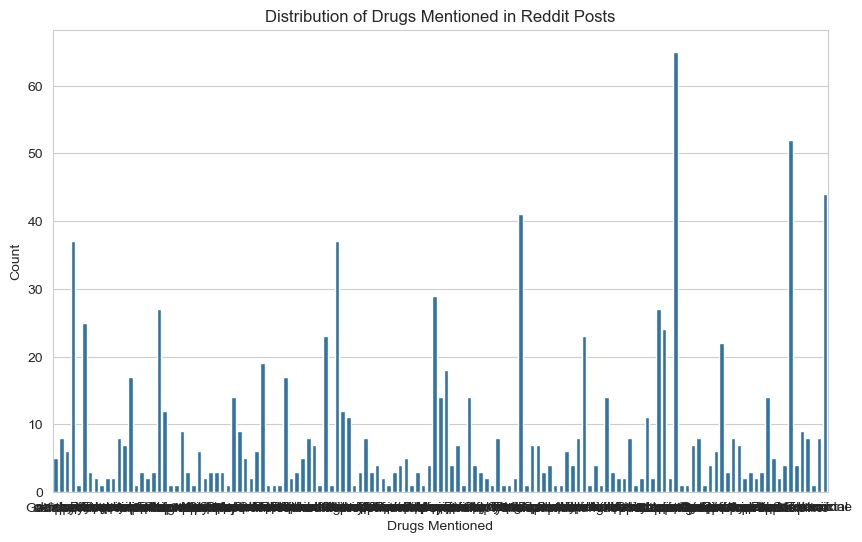

In [141]:
plt.figure(figsize=(10, 6))
sns.barplot(x=drugs_mentioned, y=numbers)
plt.xlabel("Drugs Mentioned")
plt.ylabel("Count")
plt.title("Distribution of Drugs Mentioned in Reddit Posts")
plt.show()
#It's unfortunately very hard to represent this graph. There were many drugs mentioned 

In [80]:
set(data_df['Diagnosis'].values)

{'borderline personality disorder',
 'borderline personality disorder and depression',
 'indeterminate'}

In [81]:
bpd_user_list = []
for i in range(0,len(data_df)):
    if data_df['Diagnosis'].iloc[i] ==  'borderline personality disorder':
        bpd_user_list.append(i)
bpd_num = len(bpd_user_list)

In [87]:
bpd_dep_user_list = []
for i in range(0,len(data_df)):
    if data_df['Diagnosis'].iloc[i] ==  'borderline personality disorder and depression':
        bpd_dep_user_list.append(i)
bpd_dep_num = len(bpd_dep_user_list)

In [83]:
ind_user_list = []
for i in range(0,len(data_df)):
    if data_df['Diagnosis'].iloc[i] ==  'indeterminate':
        ind_user_list.append(i)
ind_num = len(ind_user_list)

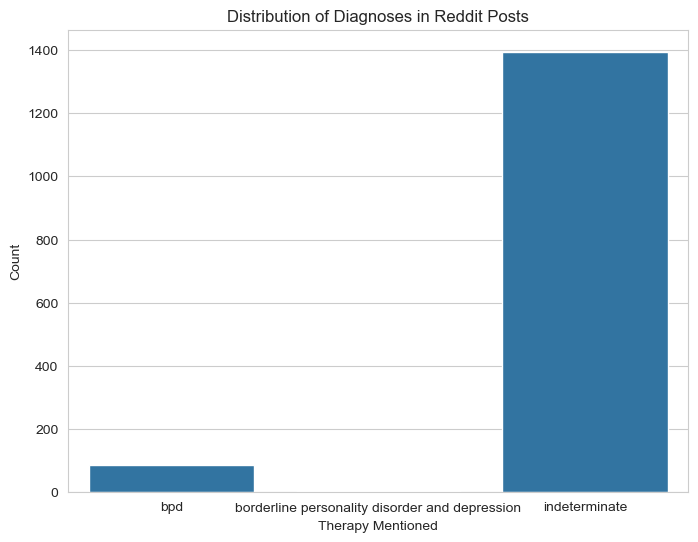

In [89]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['bpd', 'borderline personality disorder and depression', 'indeterminate'], y=[bpd_num,bpd_dep_num,ind_num])
plt.xlabel("Therapy Mentioned")
plt.ylabel("Count")
plt.title("Distribution of Diagnoses in Reddit Posts")
plt.show()

In [61]:
list_of_lists = set([' '.join(data_df['Therapies'].iloc[i]) for i in range(0,len(data_df))])
('[%s]' % ', '.join(map(str, list_of_lists)))
another_list = [[ ' c b t ' ], [ ], [ ' d b t ' ], [ ' d b t ' ,   ' e m d r ' ], [ ' e m d r ' ], [ ' c b t ' ,   ' d b t ' ]]
result = sum(another_list, [])
therapies_mentioned = list(set(result))

In [71]:
dbt_count_therapies = []
for i in range(0,len(data_df)):
    if 'dbt' in data_df['Therapies'].iloc[i]:
        dbt_count_therapies.append(i)
    else:
        pass
dbt_num = len(dbt_count_therapies) 

In [72]:
cbt_count_therapies = []
for i in range(0,len(data_df)):
    if 'cbt' in data_df['Therapies'].iloc[i]:
        cbt_count_therapies.append(i)
    else:
        pass
cbt_num = len(cbt_count_therapies) 

In [73]:
emdr_count_therapies = []
for i in range(0,len(data_df)):
    if 'emdr' in data_df['Therapies'].iloc[i]:
        emdr_count_therapies.append(i)
    else:
        pass
emdr_num = len(emdr_count_therapies) 

In [74]:
none_count_therapies = []
for i in range(0,len(data_df)):
    if data_df['Therapies'].iloc[i] == '[]':
        none_count_therapies.append(i)
    else:
        pass
none_num = len(none_count_therapies) 

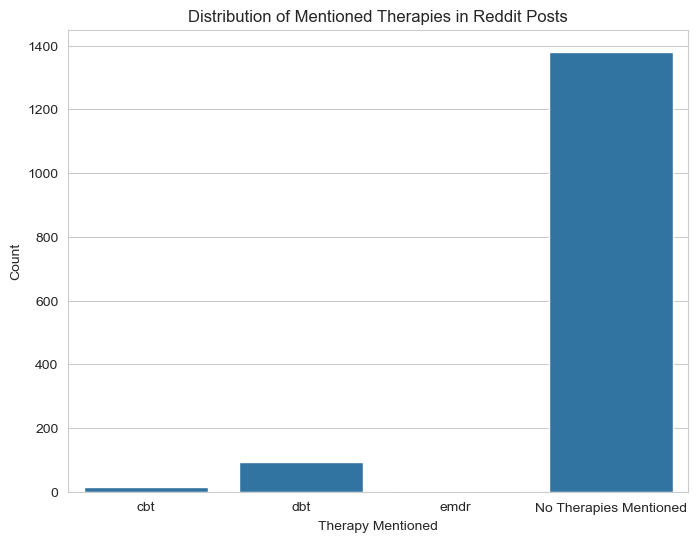

In [88]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['cbt', 'dbt', 'emdr', 'No Therapies Mentioned'], y=[cbt_num,dbt_num,emdr_num,none_num])
plt.xlabel("Therapy Mentioned")
plt.ylabel("Count")
plt.title("Distribution of Mentioned Therapies in Reddit Posts")
plt.show()

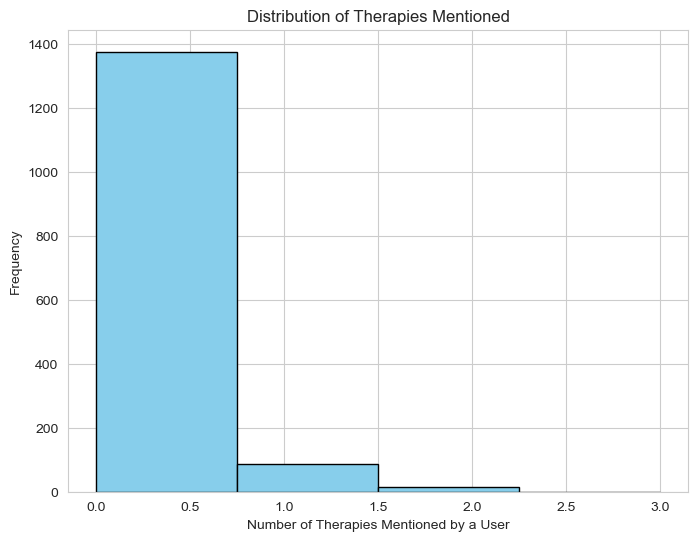

In [8]:
plt.figure(figsize=(8, 6))
x=list(data_df['Therapy_Number'].values)
plt.hist(x, bins=4, color='skyblue', edgecolor='black')
plt.xlabel("Number of Therapies Mentioned by a User")
plt.ylabel("Frequency")
plt.title("Distribution of Therapies Mentioned")
plt.show()